In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hr_df = pd.read_csv("./ibm-hr-analytics-attrition-dataset.zip")

In [4]:
pd.options.display.max_columns = 500
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
hr_df.shape

(1470, 35)

In [6]:
hr_df.columns[hr_df.dtypes == "object"].tolist()

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [7]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
y_all = hr_df.Attrition.map({"Yes":1, "No":0})

In [9]:
cat_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [10]:
#X_all = hr_df.drop(["Attrition"] + cat_cols, axis = 1).join(pd.get_dummies(hr_df[cat_cols]))

In [11]:
X_all = hr_df.drop(["Attrition"], axis = 1).copy()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for c in cat_cols:
    X_all[c] = LabelEncoder().fit_transform(hr_df[c])

In [14]:
X_all.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size = 0.3, random_state = 777)

In [17]:
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.01)

In [20]:
xgb_clf.fit(Xtr, ytr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
preds = xgb_clf.predict_proba(Xte)[:, 1]

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

In [23]:
score = roc_auc_score(yte, preds)
score

0.8132460531382365

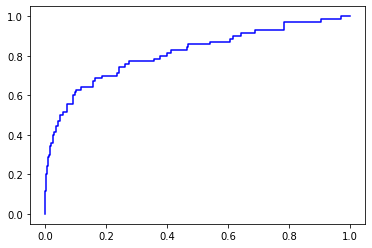

In [24]:
fpr, tpr, thresh = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

In [25]:
xgb_clf.get_booster().dump_model("out.txt")

In [26]:
!cat out.txt

booster[0]:
0:[MonthlyIncome<2488] yes=1,no=2,missing=1
	1:[OverTime<1] yes=3,no=4,missing=3
		3:[TotalWorkingYears<2] yes=7,no=8,missing=7
			7:leaf=-0.00193548377
			8:leaf=-0.0140740741
		4:[DailyRate<931] yes=9,no=10,missing=9
			9:leaf=0.0136842104
			10:leaf=-0.00363636366
	2:[StockOptionLevel<1] yes=5,no=6,missing=5
		5:[OverTime<1] yes=11,no=12,missing=11
			11:leaf=-0.0140959406
			12:leaf=-0.00666666683
		6:[YearsAtCompany<32] yes=13,no=14,missing=13
			13:leaf=-0.0171371773
			14:leaf=-0
booster[1]:
0:[MonthlyIncome<2488] yes=1,no=2,missing=1
	1:[OverTime<1] yes=3,no=4,missing=3
		3:[TotalWorkingYears<2] yes=7,no=8,missing=7
			7:leaf=-0.001918628
			8:leaf=-0.0139409415
		4:[DailyRate<931] yes=9,no=10,missing=9
			9:leaf=0.0135623412
			10:leaf=-0.00360662118
	2:[StockOptionLevel<1] yes=5,no=6,missing=5
		5:[OverTime<1] yes=11,no=12,missing=11
			11:leaf=-0.0139577454
			12:leaf=-0.00660260953
		6:[YearsAtCompany<32] yes=13,no=14,missing=13
			13:leaf=-0.0169684067
			14:le

In [28]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interact
import ipywidgets as widgets

In [29]:
def draw_tree(n = 0):
    graph = Source(xgb.to_graphviz(xgb_clf,num_trees = n))
    return display(SVG(graph.pipe(format='svg')))

In [30]:
interact(draw_tree, n = widgets.IntText(min=0, max = 500, value = 0))

interactive(children=(IntText(value=0, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.draw_tree(n=0)>

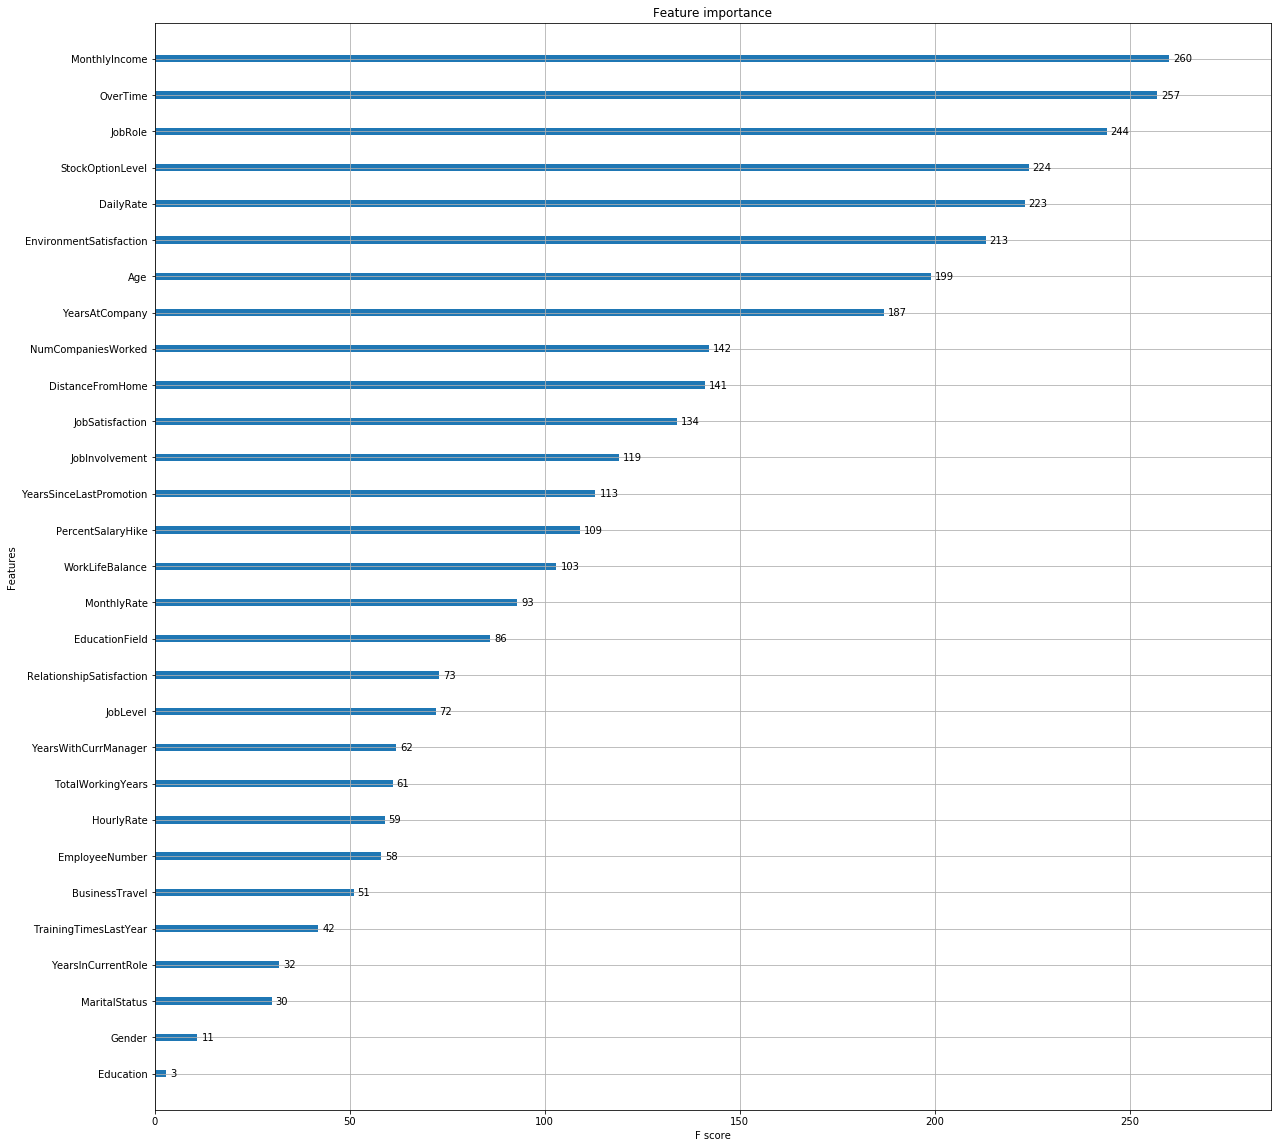

In [31]:
fig, ax = plt.subplots(figsize = (20,20))
xgb.plot_importance(xgb_clf, ax = ax)

## LightGBM

In [32]:
lgb_clf = lgb.LGBMClassifier(n_estimators = 500, learning_rate = 0.01)

In [33]:
lgb_clf.fit(Xtr, ytr)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [34]:
preds = lgb_clf.predict_proba(Xte)[:, 1]

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

In [36]:
score = roc_auc_score(yte, preds)
score

0.8033115132845591

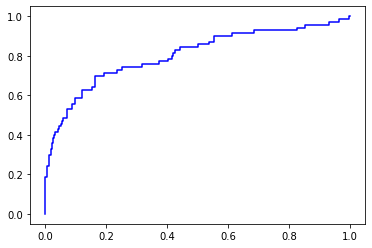

In [37]:
fpr, tpr, thresh = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

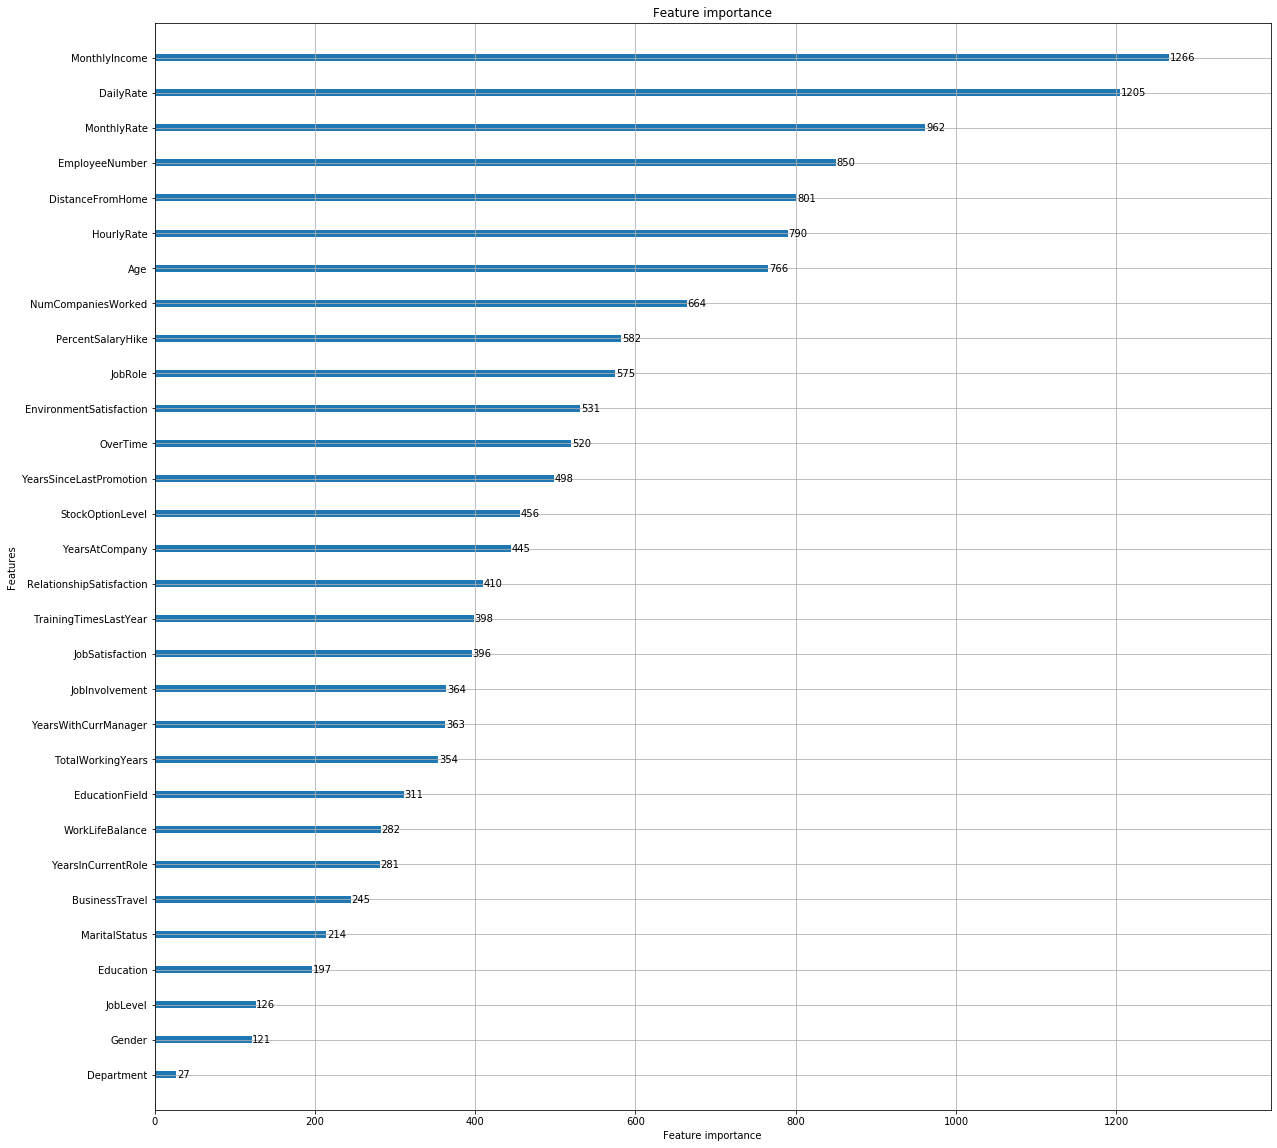

In [38]:
fig, ax = plt.subplots(figsize= (20,20))

lgb.plot_importance(lgb_clf, ax = ax)

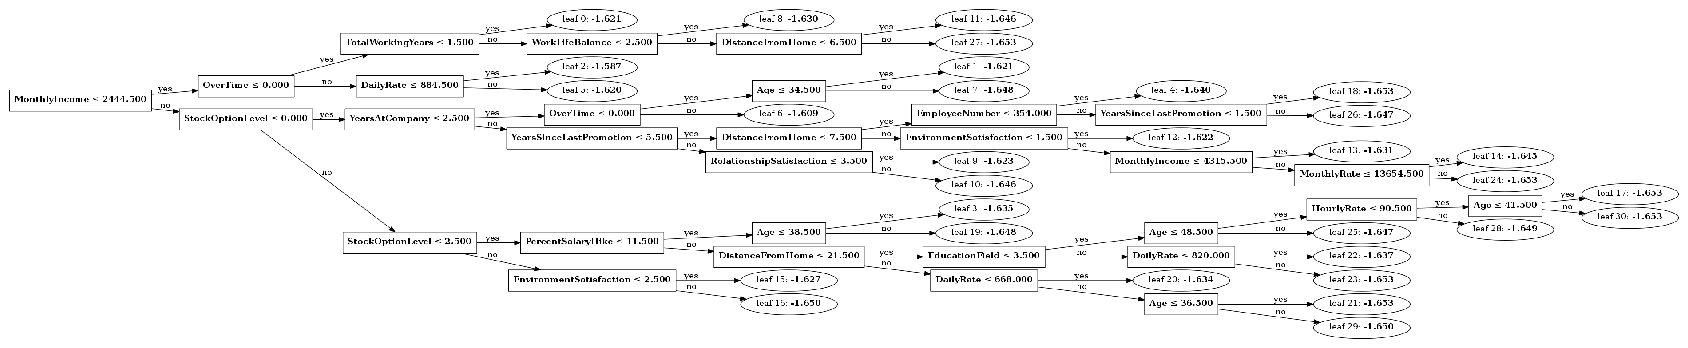

In [39]:
fig, ax = plt.subplots(figsize= (30,30))
lgb.plot_tree(lgb_clf, tree_index = 0, ax = ax)

## Adding noise

In [40]:
X_all["Noise"] = np.random.randint(X_all.MonthlyIncome.min(), X_all.MonthlyIncome.max() , X_all.shape[0])

In [41]:
Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size = 0.3, random_state = 777)

In [42]:
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.01)

In [43]:
xgb_clf.fit(Xtr, ytr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
preds = xgb_clf.predict_proba(Xte)[:, 1]

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve

In [46]:
score = roc_auc_score(yte, preds)
score

0.8052753176742395

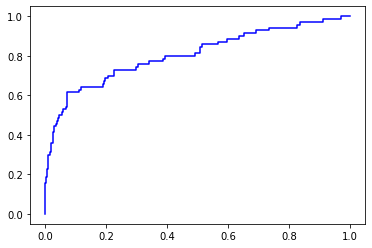

In [47]:
fpr, tpr, thresh = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

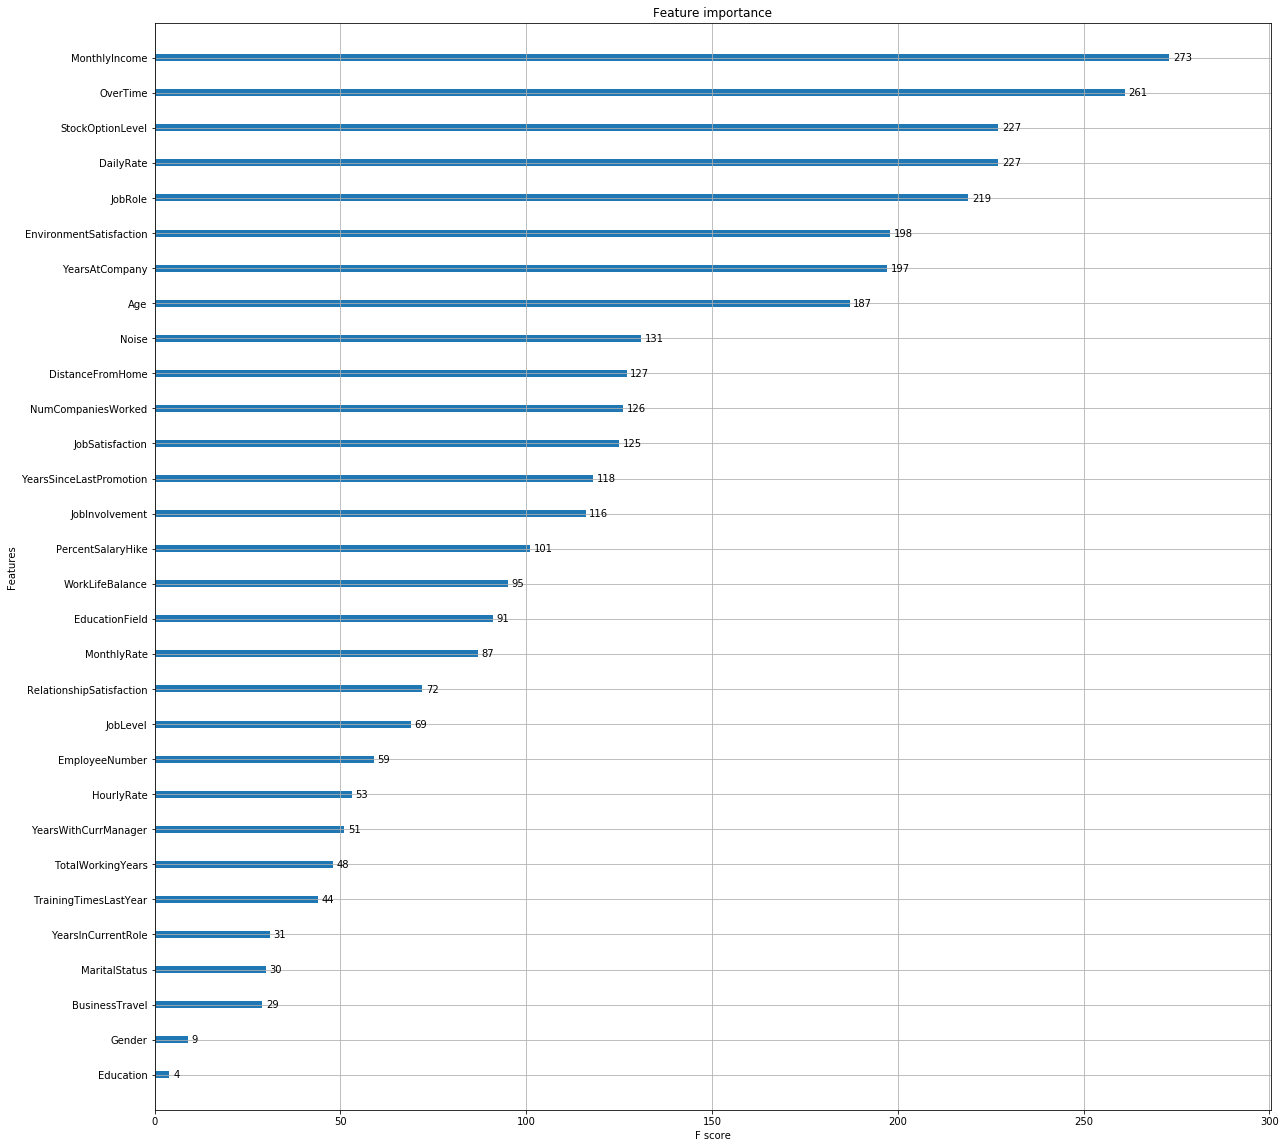

In [48]:
fig, ax = plt.subplots(figsize = (20,20))
xgb.plot_importance(xgb_clf, ax = ax)

In [49]:
lgb_clf = lgb.LGBMClassifier(n_estimators = 500, learning_rate = 0.01)

In [50]:
lgb_clf.fit(Xtr, ytr)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.01, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
preds = lgb_clf.predict_proba(Xte)[:, 1]

In [52]:
from sklearn.metrics import roc_auc_score, roc_curve

In [53]:
score = roc_auc_score(yte, preds)
score

0.8047747400847132

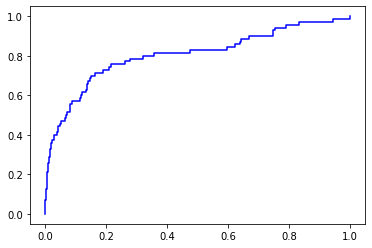

In [54]:
fpr, tpr, thresh = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

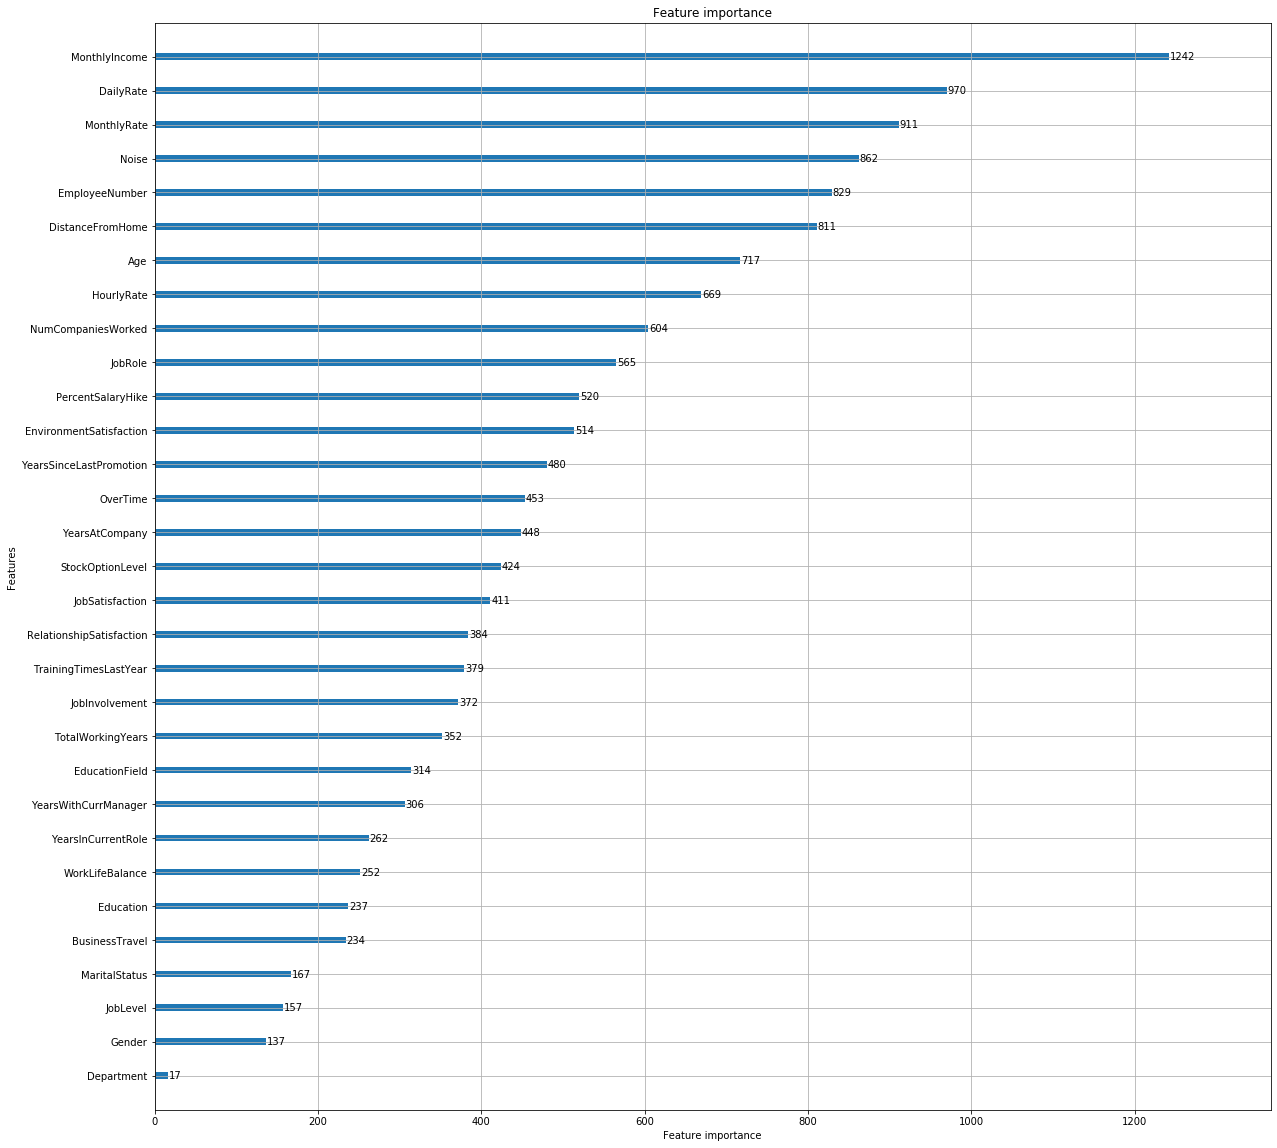

In [55]:
fig, ax = plt.subplots(figsize= (20,20))

lgb.plot_importance(lgb_clf, ax = ax)